In [47]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

kaggle/input\test.csv
kaggle/input\train.csv


In [49]:
train = pd.read_csv('kaggle/input/train.csv')
test = pd.read_csv('kaggle/input/test.csv')

In [50]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 12)


In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
categorical_cols= train.select_dtypes(include=['object'])
print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')
for cols in categorical_cols.columns:
    print(cols,':', len(categorical_cols[cols].unique()),'labels')

The dataset contains 5 categorical columns
Name : 891 labels
Sex : 2 labels
Ticket : 681 labels
Cabin : 148 labels
Embarked : 4 labels


In [55]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
import plotly.graph_objects as go

In [57]:
base_colors = ['#20618E',  '#6880AD',  '#57A7F3']

labels = [x for x in train.Sex.value_counts().index]
values = train.Sex.value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0.03, 0])])

fig.update_layout(
    title_text="Gender ")
fig.update_traces(marker=dict(colors=base_colors))
fig.show()

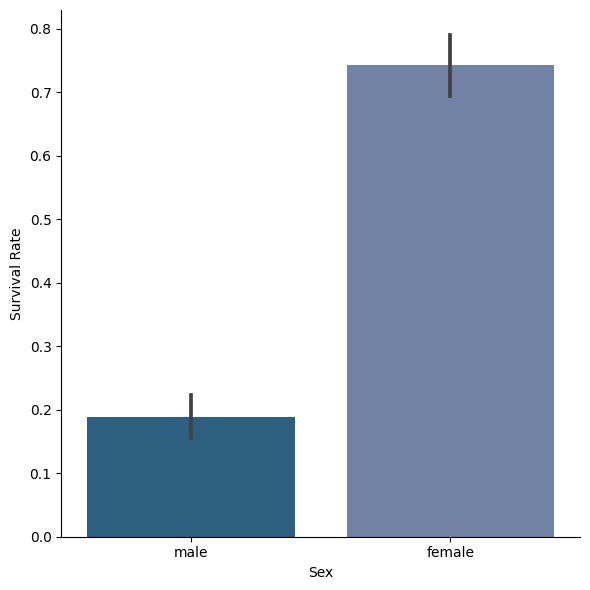

In [58]:
gender_analysis = sns.catplot(x="Sex",y="Survived",data=train, kind="bar", height = 6, palette = base_colors)
gender_analysis = gender_analysis.set_ylabels("Survival Rate")

In [59]:
labels = [x for x in train.Pclass.value_counts().index]
values = train.Pclass.value_counts()

fig = go.Figure(data=[go.Pie(labels=['C3','C1','C2'], values=values, hole=.3,pull=[0,0,0.04])])

fig.update_layout(
    title_text="Ticket class ")
fig.update_traces(marker=dict(colors=base_colors))
fig.show()

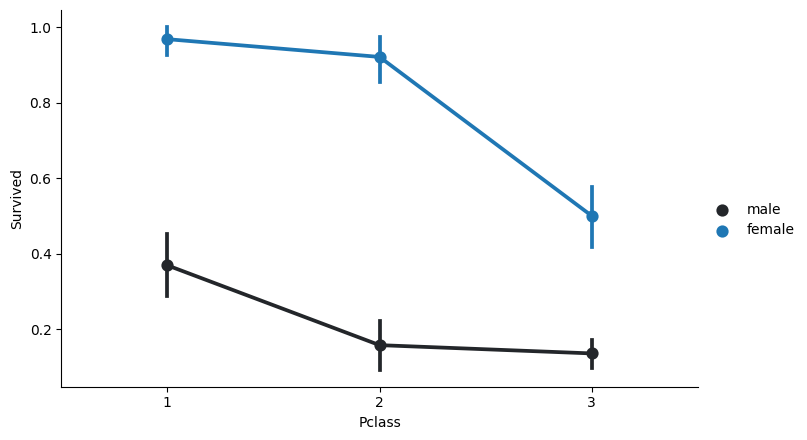

In [60]:
gender_pclass = sns.FacetGrid(train, height=4.5, aspect=1.6)
gender_pclass.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None )
gender_pclass.add_legend();

In [61]:
train=train.drop(['PassengerId','Name','Ticket'],1)
test=test.drop(['PassengerId','Name','Ticket'],1)

In [62]:
train['Survived']=train['Survived'].astype('int')
train['Pclass']=train['Pclass'].astype('int')
train['SibSp']=train['SibSp'].astype('int')

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Pclass    891 non-null    int32  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int32  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 52.3+ KB


In [64]:
features=[features for features in train.columns if train[features].isnull().sum()>1]
for feature in features:
    print(feature, np.round(train[feature].isnull().mean()*100, 2),  ' % missing values.\n')

Age 19.87  % missing values.

Cabin 77.1  % missing values.

Embarked 0.22  % missing values.



In [65]:
train=train.drop(['Cabin'],1)
test=test.drop(['Cabin'],1)

In [66]:
categorical_cols_train= train.select_dtypes(include=['object'])

print(f'The dataset contains {len(categorical_cols_train.columns.tolist())} categorical columns')

The dataset contains 2 categorical columns


In [67]:
categorical_cols_train.describe()

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [68]:
categorical_cols_missing = categorical_cols_train.columns[categorical_cols_train.isnull().any()]
categorical_cols_missing

Index(['Embarked'], dtype='object')

In [69]:
from sklearn.impute import SimpleImputer
categoricalImputer = SimpleImputer(missing_values = np.NaN,strategy = 'most_frequent')
for feature in categorical_cols_missing:
     categorical_cols_train[feature] = categoricalImputer.fit_transform(categorical_cols_train[feature].values.reshape(-1,1))
     train[feature] = categoricalImputer.fit_transform(train[feature].values.reshape(-1,1))

In [70]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [71]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [72]:
np.random.seed(1)
train['Age'].fillna(np.random.randint(20,38), inplace = True)
test['Age'].fillna(np.random.randint(20,38), inplace = True)
test['Fare'].fillna(np.random.randint(0,31), inplace = True)

In [73]:
cleanup_nums = {"Sex": {"male": 1, "female": 0}}
train= train.replace(cleanup_nums)
test= test.replace(cleanup_nums)

In [74]:
train=pd.get_dummies(train, columns=["Embarked"])
test=pd.get_dummies(test, columns=["Embarked"])

In [75]:
data = train[[i for i in train.columns if i not in ('Age','SibSp','Parch','Pclass','Fare',)]]

In [76]:
train.shape

(891, 10)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int32
 1   Sex         891 non-null    int64
 2   Embarked_C  891 non-null    uint8
 3   Embarked_Q  891 non-null    uint8
 4   Embarked_S  891 non-null    uint8
dtypes: int32(1), int64(1), uint8(3)
memory usage: 13.2 KB


In [78]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [79]:
rows= []

for var1 in data:
  col = []
  for var2 in data:
    cramers =cramers_V(data[var1], data[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data.columns, index =data.columns)

df

,Survived,Sex,Embarked_C,Embarked_Q,Embarked_S
Survived,1.00,0.29,0.03,0.00,0.02
Sex,0.29,1.00,0.01,0.00,0.01
Embarked_C,0.03,0.01,0.99,0.02,0.61
Embarked_Q,0.00,0.00,0.02,0.99,0.24
Embarked_S,0.02,0.01,0.61,0.24,0.99


<AxesSubplot:>

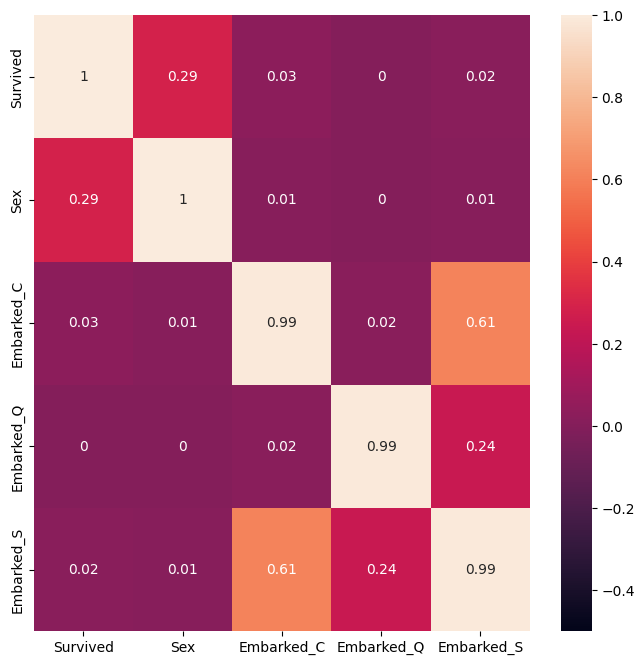

In [80]:
plt.figure(figsize=(8,8))
plt_data = data[:]
sns.heatmap(df, vmin = -0.5,vmax = 1,annot=True)

In [81]:
X= train.drop(['Survived'],1)
y=train['Survived']

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


Logistic Regression

train accuracy: 0.797752808988764 
 test accuracy: 0.8491620111731844


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       120
           1       0.73      0.86      0.79        59

    accuracy                           0.85       179
   macro avg       0.83      0.85      0.84       179
weighted avg       0.86      0.85      0.85       179



confusion matrix for logistic regression


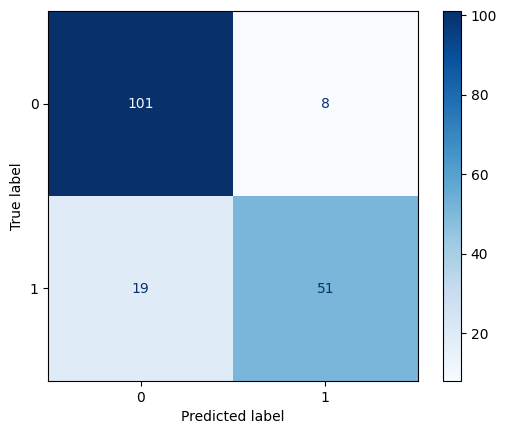

In [84]:
lr = LogisticRegression(max_iter=2000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lr, x_test, y_test,cmap=plt.cm.Blues , values_format='d')

Random Forest

train accuracy: 0.9831460674157303 
 test accuracy: 0.8212290502793296


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       111
           1       0.76      0.78      0.77        68

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



confusion matrix for random forest classifier


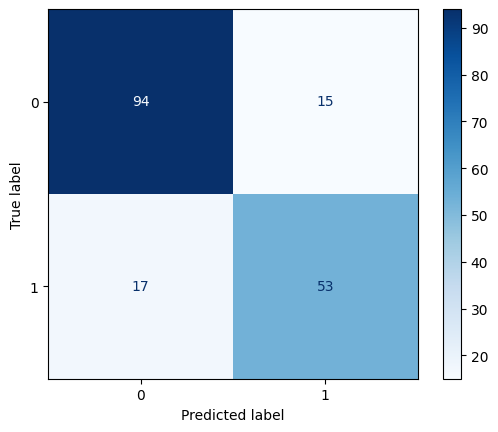

In [85]:
rf=RandomForestClassifier(random_state=1234)
model2=rf.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

Decision Tree

train accuracy: 0.9831460674157303 
 test accuracy: 0.7988826815642458


classification report for decision tree classifier
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.74      0.74      0.74        70

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



confusion matrix for decision tree classifier


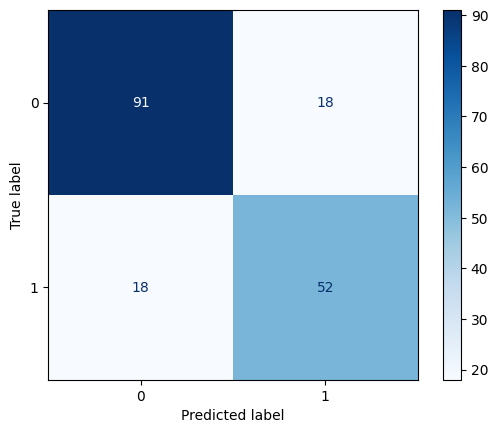

In [86]:
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dt, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

Adaboost Classifier

train accuracy: 0.8314606741573034 
 test accuracy: 0.8156424581005587


classification report for adaboost classifier
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       112
           1       0.74      0.78      0.76        67

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



confusion matrix for adaboost classifier


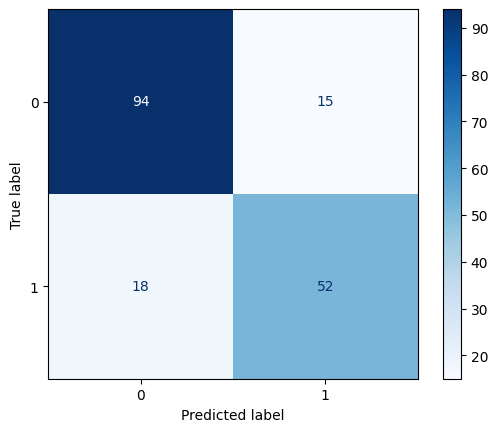

In [87]:
ada=AdaBoostClassifier()
model4=ada.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

adapred = ada.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adapred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(ada, x_test, y_test ,cmap=plt.cm.Blues , values_format='d')

Ridge Classifier

train accuracy: 0.7893258426966292 
 test accuracy: 0.8379888268156425


classification report for Ridge Classification
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       122
           1       0.70      0.86      0.77        57

    accuracy                           0.84       179
   macro avg       0.81      0.84      0.82       179
weighted avg       0.85      0.84      0.84       179



confusion matrix for Ridge Regression


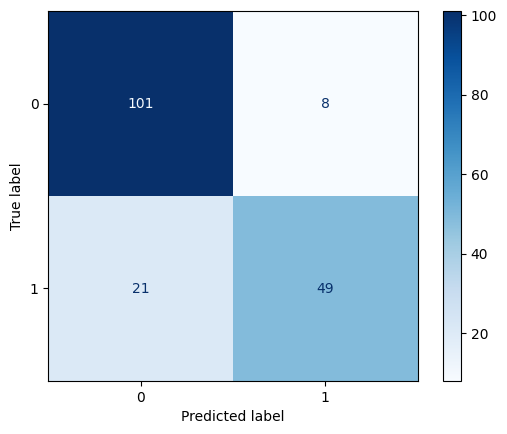

In [88]:
rc =RidgeClassifier()
model5=rc.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),"\n","test accuracy:",model5.score(x_test,y_test))
rcpred = rc.predict(x_test)
print("\n")
print("classification report for Ridge Classification")
print(classification_report(rcpred,y_test))
print("\n")
print("confusion matrix for Ridge Regression")
displr = plot_confusion_matrix(rc, x_test, y_test,cmap=plt.cm.Blues , values_format='d')

### K-fold Cross Validation for choosing the best model

In [89]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = x_train, y = y_train, cv = 10)
print("Logistic Regression Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("\n")
accuracies = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = 10)
print("Random Forest Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("\n")
accuracies = cross_val_score(estimator = dt, X = x_train, y = y_train, cv = 10)
print("Decision Tree Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("\n")
accuracies = cross_val_score(estimator = ada, X = x_train, y = y_train, cv = 10)
print("AdaBoost Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("\n")
accuracies = cross_val_score(estimator = rc, X = x_train, y = y_train, cv = 10)
print("Ridge Classification Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("\n")


Logistic Regression Accuracy: 78.65 %
Standard Deviation: 3.72 %


Random Forest Accuracy: 81.89 %
Standard Deviation: 2.82 %


Decision Tree Accuracy: 77.82 %
Standard Deviation: 6.28 %


AdaBoost Accuracy: 78.93 %
Standard Deviation: 3.91 %


Ridge Classification Accuracy: 78.65 %
Standard Deviation: 3.69 %




We can see that Random forest is the best model for this dataset.

### ROC Curve

Logistic: ROC AUC=0.875


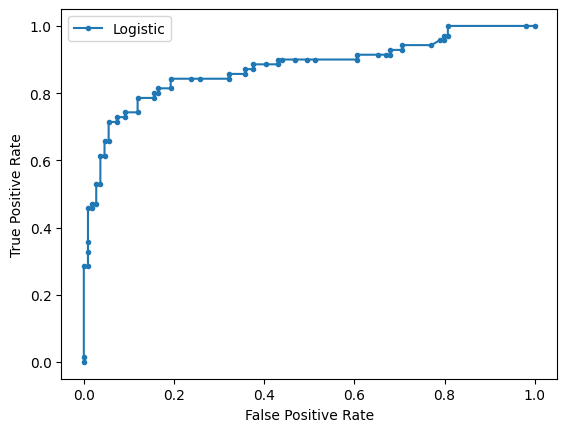

In [96]:
# ROC curve for logistic regression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_probs = lr.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

Random Forest: ROC AUC=0.859


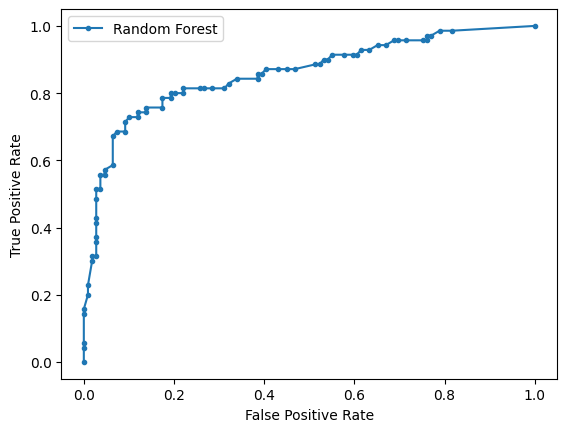

In [97]:
# ROC curve for random forest
rf_probs = rf.predict_proba(x_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()


Decision Tree: ROC AUC=0.781


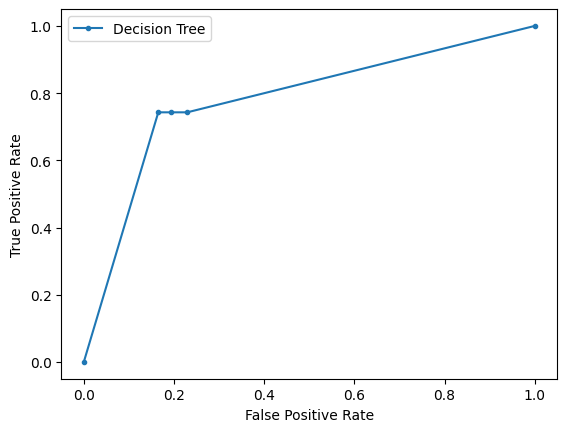

In [98]:
# ROC curve for decision tree
dt_probs = dt.predict_proba(x_test)
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(y_test, dt_probs)
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()


AdaBoost: ROC AUC=0.861


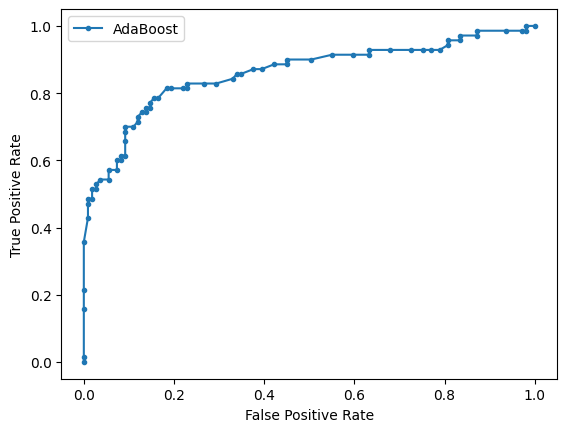

In [99]:
# ROC curve for adaboost
ada_probs = ada.predict_proba(x_test)
ada_probs = ada_probs[:, 1]
ada_auc = roc_auc_score(y_test, ada_probs)
print('AdaBoost: ROC AUC=%.3f' % (ada_auc))
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
pyplot.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
